In [1]:
import numpy as np
from scipy.optimize import fixed_point
import matplotlib.pyplot as plt

In [2]:
b = 5

In [3]:
def solve_r(a, b):
    f = lambda r: np.exp(-(1 - r**a) * (1 - r**b) / (a * r**a + b * r**b - (a + b) * r**(a + b)))
    for r0 in np.arange(.1, 1, .1):
        try:
            rc = fixed_point(f, r0).item()
        except RuntimeError:
            continue
        else:
            if rc < .0001 or rc > .9999:
                continue
            else:
                break
    return rc

In [4]:
pc_list = []
rc_list = []
x = np.linspace(.01, 1)

for a in x * b:
    rc = solve_r(a, b)
    rc_list.append(rc)
    pc_list.append(1 / (a * rc**a + b * rc**b - (a + b) * rc**(a + b)))

C:\Users\kuzne\AppData\Local\Temp/ipykernel_13008/1600061885.py:2: RuntimeWarning: invalid value encountered in power
  f = lambda r: np.exp(-(1 - r**a) * (1 - r**b) / (a * r**a + b * r**b - (a + b) * r**(a + b)))
C:\Users\kuzne\AppData\Local\Temp/ipykernel_13008/1600061885.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda r: np.exp(-(1 - r**a) * (1 - r**b) / (a * r**a + b * r**b - (a + b) * r**(a + b)))
C:\Users\kuzne\AppData\Local\Temp/ipykernel_13008/1600061885.py:2: RuntimeWarning: overflow encountered in double_scalars
  f = lambda r: np.exp(-(1 - r**a) * (1 - r**b) / (a * r**a + b * r**b - (a + b) * r**(a + b)))
C:\Users\kuzne\AppData\Local\Temp/ipykernel_13008/1600061885.py:2: RuntimeWarning: overflow encountered in exp
  f = lambda r: np.exp(-(1 - r**a) * (1 - r**b) / (a * r**a + b * r**b - (a + b) * r**(a + b)))
C:\Users\kuzne\AppData\Local\Temp/ipykernel_13008/1600061885.py:2: RuntimeWarning: invalid value encountered in double_scalars
  f = lamb

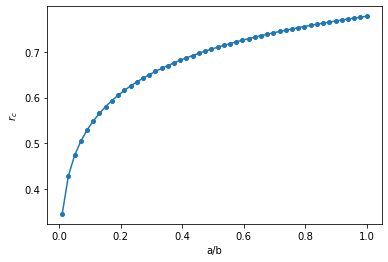

In [5]:
plt.plot(x, rc_list, 'o-', ms=4)
plt.xlabel('a/b')
plt.ylabel('$r_c$');

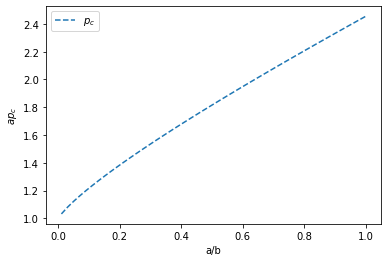

In [6]:
plt.plot(x, x * b * pc_list, '--', label='$p_c$')
plt.xlabel('a/b')
plt.ylabel('$ap_c$')
plt.legend();